#CM4709 Computer Vision
#Lab 03 Neural Network

##Aims
1. Use the Keras library to build a neural network.
1. Train a neural network to classify images in a dataset.

##The Keras Library
Keras is a Deep Learning API built on top of Tensorflow.
It allows users to quickly create, train, and validate Deep Learning models using neural network.
You can find the Keras library and its documentation at [https://keras.io/](https://keras.io/).
Both Keras and Tensorflow are readily available in Colab.

##The Dataset

We will use the [fashion MNIST dataset](https://www.kaggle.com/datasets/zalando-research/fashionmnist) to run through the implementation of a neural networks using Keras.
This dataset has 70,000 gray scale image. Each of these images is $28 \times 28$ pixel in size. There are 10 different classes in the dataset.

##Loading the Dataset
Fortunately, the fashion MNIST data is readily available in Keras. ( Documentation is [here](https://keras.io/api/datasets/fashion_mnist/).)
Loading the dataset is the simple task of importing the Keras library and calling a function.

The [`load_data()` function](https://keras.io/api/datasets/fashion_mnist/#loaddata-function) returns a tuple in the format:

`(x_train,y_train),(x_test,y_test)`

where:
* `x_train`: are numpy array of grayscale images for training
* `y_train`: are the labels of the training dataset
* `x_test`: are the images for testing
* `y_test`: are the labels for testing

Simply speaking, the `x_...` datasets are images.
The `y_...` datasets are class labels.
Class labels are in the range 0-9. (Reference is [here](https://keras.io/api/datasets/fashion_mnist/).)

The following code loads the dataset and prints out some information:

In [16]:
#import libraries
import tensorflow as tf
from tensorflow import keras

#load dataset from Keras
(x_train_full,y_train_full),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

print('Full training dataset (images):',x_train_full.shape)
print('Full training dataset (labels):',y_train_full.shape)
print('Testing dataset (images):',x_test.shape)
print('Testing dataset (labels):',y_test.shape)


Full training dataset (images): (60000, 28, 28)
Full training dataset (labels): (60000,)
Testing dataset (images): (10000, 28, 28)
Testing dataset (labels): (10000,)


##Questions:
1. How do you interpret the "shape" of the numpy arrays reported?
1. How many instances are there in the training and testing datasets respectively?

##Creating a Validation Dataset

It is a good habit to create a validation dataset for the purpose of making sure that our model can generalise well over unseen examples.
The validation dataset is different from the testing dataset.
While a testing dataset is not touched until we evaluate the performance of the model, the validation dataset is used to fine tune hyperparameters of the model, and will be used during the training process.

In the following code, we split the full training data into training, and validation datsets:

In [17]:
#import libraries
import tensorflow as tf
from tensorflow import keras

#load dataset from Keras
(x_train_full,y_train_full),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

#split full training dataset into validation and training subsets
x_valid=x_train_full[:5000]/255.0
x_train=x_train_full[5000:]/255.0
y_valid=y_train_full[:5000]
y_train=y_train_full[5000:]

print('Full training dataset (images): ',x_train_full.shape)
print('Full training dataset (labels): ',y_train_full.shape)
print('Training dataset (images): ',x_train.shape)
print('Training dataset (labels): ',y_train.shape)
print('Validation dataset (images): ',x_valid.shape)
print('Validation dataset (labels): ',y_valid.shape)
print('Testing dataset (images): ',x_test.shape)
print('Testing dataset (labels): ',x_test.shape)


Full training dataset (images):  (60000, 28, 28)
Full training dataset (labels):  (60000,)
Training dataset (images):  (55000, 28, 28)
Training dataset (labels):  (55000,)
Validation dataset (images):  (5000, 28, 28)
Validation dataset (labels):  (5000,)
Testing dataset (images):  (10000, 28, 28)
Testing dataset (labels):  (10000, 28, 28)


##Questions:
1. Why do we divide the value of the image arrays by 255.0?

##Class Labels

The class labels are in the range 0-9, with each value corresponding to a type of garment.
The following code visualises some images from the training dataset and display them with their labels:

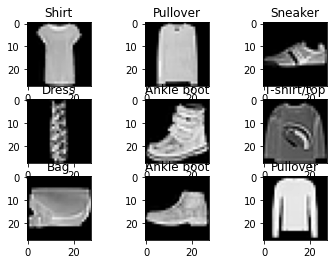

In [19]:
#import libraries
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot   #added matplotlib
import random                   #added random

#load dataset from Keras
(x_train_full,y_train_full),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

#split full training dataset into validation and training subsets
x_valid=x_train_full[:5000]/255.0
x_train=x_train_full[5000:]/255.0
y_valid=y_train_full[:5000]
y_train=y_train_full[5000:]

#class names in an array
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#get size of training dataset
(instance_count,width,height)=x_train.shape

#randomly show 9 images from training dataset
for i in range(9):
  #get a random index within the training dataset
  index=random.randint(0,instance_count-1)

  #get image from training dataset
  image=x_train[index]
  pyplot.subplot(3,3,i+1)
  pyplot.imshow(image,cmap='gray')
  
  #get image label from training dataset
  pyplot.title(class_names[y_train[index]])

##Building the Neural Network

The following code builds a neural network of 4 layers.
1. We use a [Sequential model](https://keras.io/guides/sequential_model/).
1. In the input layer, we will feed a grayscale image of size $28 \times 28$. We use a [Flatten layer](https://keras.io/api/layers/reshaping_layers/flatten/).
1. The 2 hidden layers are [Dense layers](https://keras.io/api/layers/core_layers/dense/).
1. The output layer has 10 neurons as there are 10 classes.
1. In the output layer, we use the [Softmax activation function](https://keras.io/api/layers/activations/#softmax-function). (Also see [this article](https://towardsdatascience.com/softmax-activation-function-how-it-actually-works-d292d335bd78) on the explanation of Softmax.)

In [20]:
#import libraries
import tensorflow as tf
from tensorflow import keras

#create a neural network using Keras
model=keras.models.Sequential()

#build the first input layer
model.add(keras.layers.Flatten(input_shape=(28,28)))

#add the next hidden, dense layer with 300 neurons, using ReLU activation function
model.add(keras.layers.Dense(300,activation='relu'))

#add the next hidden layer with 100 neurons, using ReLU
model.add(keras.layers.Dense(100,activation='relu'))

#add the output layer with 10 neurons, corresponding to the 10 classes
model.add(keras.layers.Dense(10,activation='softmax'))

#print a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


##Questions
Look at the shape and number of parameters in each layer.
Every parameter in the model corresponds to a weight.
1. How many neurons do we have in the input layer?
1. How many weights (i.e. parameters) do we have in the input layer?
1. In the 2nd layer (i.e. 1st hidden layer), how many neurons do we have?
1. How many weights are there in the 2nd layer (i.e. 1st hidden layer)? How is this number computed/decided?


##The Weights
Our network is not trained at the moment.
All weights are randomly assigned a value.
The following code print out the values of the weights and biases.
(Reference of `layers.get_weights()` is [here](https://keras.io/api/layers/base_layer/#getweights-method).)

In [23]:
#import libraries
import tensorflow as tf
from tensorflow import keras

#create a neural network using Keras
model=keras.models.Sequential()

#build the first input layer
model.add(keras.layers.Flatten(input_shape=(28,28)))

#add the next hidden, dense layer with 300 neurons, using ReLU activation function
model.add(keras.layers.Dense(300,activation='relu'))

#add the next hidden layer with 100 neurons, using ReLU
model.add(keras.layers.Dense(100,activation='relu'))

#add the output layer with 10 neurons, corresponding to the 10 classes
model.add(keras.layers.Dense(10,activation='softmax'))

#get weight & baises in the 2nd layer (i.e. 1st hidden layer)
(weights,biases)=model.layers[1].get_weights()

print('Weights:')
print(weights)
print('Biases:')
print(biases)

Weights:
[[-0.02302774 -0.00774644  0.0353773  ...  0.00426906 -0.05679414
  -0.01457564]
 [-0.03523969  0.07311121  0.04963337 ...  0.0365238   0.03877839
  -0.02440526]
 [-0.05158727  0.05440912  0.06149906 ...  0.05562955 -0.02985167
  -0.0355898 ]
 ...
 [ 0.02327505  0.01454176 -0.00010476 ...  0.0100205  -0.01863548
   0.01853751]
 [ 0.05045662 -0.06572909  0.02653269 ... -0.03153182 -0.04325354
  -0.05669424]
 [-0.02653844 -0.02528175  0.06837843 ...  0.04349691  0.00732923
   0.06979166]]
Biases:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

##Compiling and Training the Model

Once the model is built, we need to compile it before training. Compilation essentially configures the model in defining its loss function, optimizer, and metrics used to determine its accuracy.

List of methods on `model` can be found [here](https://keras.io/api/models/model_training_apis/), including [`compile(...)`](https://keras.io/api/models/model_training_apis/#compile-method), and [`fit(...)`](https://keras.io/api/models/model_training_apis/#fit-method).

Finally, we training the model by giving it the training dataset and run it through a number of epoches.

In [2]:
#import libraries
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot   #added matplotlib
import random                   #added random

#load dataset from Keras
fashion_mnist=keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()

#split full training dataset into validation and training subsets
x_valid=x_train_full[:5000]/255.0
x_train=x_train_full[5000:]/255.0
y_valid=y_train_full[:5000]
y_train=y_train_full[5000:]

#create a neural network using Keras
model=keras.models.Sequential()

#build the first input layer
model.add(keras.layers.Flatten(input_shape=(28,28)))

#add the next hidden, dense layer with 300 neurons, using ReLU activation function
model.add(keras.layers.Dense(300,activation='relu'))

#add the next hidden layer with 100 neurons, using ReLU
model.add(keras.layers.Dense(100,activation='relu'))

#add the output layer with 10 neurons, corresponding to the 10 classes
model.add(keras.layers.Dense(10,activation='softmax'))

#compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics='accuracy')

#train model
history=model.fit(x_train,y_train,epochs=30,
                  validation_data=(x_valid,y_valid))

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/30
1719/1719 [==============================] - 10s 3ms/step - loss: 0.7299 - accuracy: 0.7601 - val_loss: 0.5046 - val_accuracy: 0.8342
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4923 - accuracy: 0.8283 - val_loss: 0.4651 - val_accuracy: 0.8434
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4480 - accuracy: 0.8436 - val_loss: 0.4237 - val_accuracy: 0.8510
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4195 - accuracy: 0.8539 - val_loss: 0.4035 - val_accuracy: 0.8608
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3994 - accuracy: 0.8612 - val_loss: 0.3868 - val_accuracy: 0.8630
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3829 - accuracy: 0.8660 - val_loss: 0.3753 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - lo

##Visualising the Training

The [`fit(...)` method](https://keras.io/api/models/model_training_apis/#fit-method) returns a `History` object which contains information collected from all epochs.
Plotting these data allow us to see how the model performs during the training process. e.g. You should expect the loss to decrease, and accuracy to increase over epoch.
If performance worsens with more training, it may indicate that the model is overfitting.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


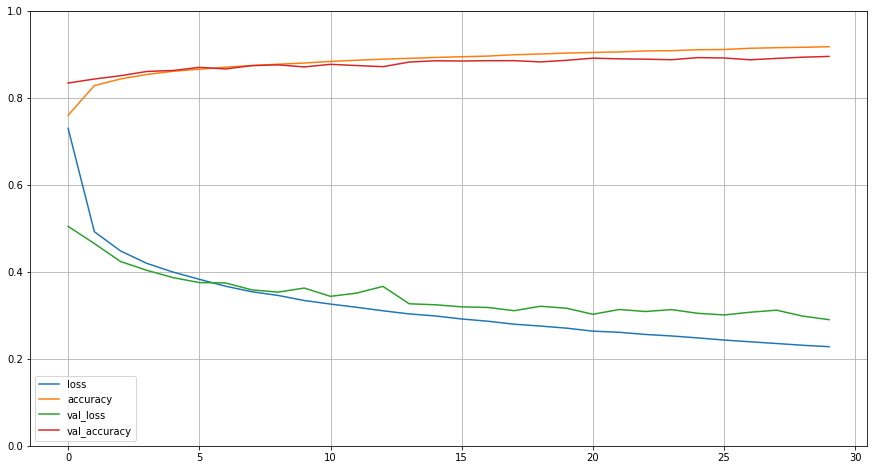

In [34]:
import pandas as pd
import matplotlib.pyplot as pyplot

#show keys in the history
print(history.history.keys())

#plot graphs
pd.DataFrame(history.history).plot(figsize=(15,8))
pyplot.grid(True)
pyplot.gca().set_ylim(0,1)
pyplot.show()

##Testing the Model

To evaluate the performance of our model, we use the testing dataset.

1. Reference of `evaluate()` method is [here](https://keras.io/api/models/model_training_apis/#evaluate-method).

In [5]:
#evaluate the model using the testing dataset
(loss,accuracy)=model.evaluate(x_test,y_test)

print('Loss: ',loss)
print('Accuracy: ',round(accuracy,2)*100,'%')

313/313 [==============================] - 1s 3ms/step - loss: 65.6602 - accuracy: 0.8428
Loss:  65.66015625
Accuracy:  84.0 %


##Doing Prediction

We can now use the trained model for prediction. We will:
1. Take 1 image from the testing data.
1. Ask the trained model to predict which class the image belongs to.

Image shape:  (1, 28, 28)
1/1 [==============================] - 0s 27ms/step
Prediction output:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted class:  Ankle boot


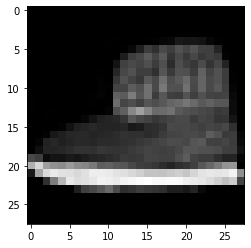

In [14]:
import numpy as np

#class names in an array
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#get a random image from the testing dataset
(instance_count,width,height)=x_test.shape    #get dataset size
index=random.randint(0,instance_count-1)      #get an index witin dataset
image=x_test[index]                           #get image
pyplot.imshow(image,cmap='gray')              #show image

#need to add 1 dimension to array to fit input shape
oneImage=np.expand_dims(image,axis=0)
print('Image shape: ',oneImage.shape)

#predict image class
[prediction]=model.predict(oneImage)
print('Prediction output: ',prediction)

classIndex=np.argmax(prediction,axis=-1)

predictedClass=class_names[classIndex]
print('Predicted class: ',predictedClass)

In [ ]:
images=x_test
print(images.shape)
model.predict(images)

(10000, 28, 28)
313/313 [==============================] - 0s 2ms/step


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

##Tasks
You may want to try the followings to see if it can improve the overall performance of your neural network:
1. Increase the number of hidden layers.
1. Increase the number of neurons in different layers.
1. Modify some parameters. e.g. use a different optimizer, learning rate, etc.
